Author : Thejaswini Ram<br><br>
*This notebook focuses on preparing a dataset named Sick that contains 4500 pairs of sentences for analysing semantic similarity.*




In [ ]:
import numpy as np
import pandas as pd       #importing numpy and pandas libraries 
                

In [ ]:
!wget https://raw.githubusercontent.com/jmstanto/ist664/main/SICK_train.txt   #URL network downloader, used to download files 

--2022-03-24 12:05:14--  https://raw.githubusercontent.com/jmstanto/ist664/main/SICK_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 506243 (494K) [text/plain]
Saving to: ‘SICK_train.txt’

SICK_train.txt      100%[===================>] 494.38K  --.-KB/s    in 0.04s   

2022-03-24 12:05:14 (13.7 MB/s) - ‘SICK_train.txt’ saved [506243/506243]



In [ ]:
sick_data = pd.read_csv("https://raw.githubusercontent.com/jmstanto/ist664/main/SICK_train.txt" , sep='\t', on_bad_lines='skip', index_col=None) 

sick_data.head(10)   #reading the SICK_train dataset and displaying few rows of data (sentence pairs together) with the score of relatedness; 
                        #relatedness scores ranges from 1 to 5 points

,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.5,NEUTRAL
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,3.2,NEUTRAL
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.7,ENTAILMENT
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,3.4,NEUTRAL
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,3.7,NEUTRAL
5,12,Two dogs are fighting,Two dogs are wrestling and hugging,4.0,NEUTRAL
6,14,A brown dog is attacking another animal in fro...,Two dogs are fighting,3.5,NEUTRAL
7,18,A brown dog is attacking another animal in fro...,Two dogs are wrestling and hugging,3.2,NEUTRAL
8,25,Nobody is riding the bicycle on one wheel,A person in a black jacket is doing tricks on ...,2.8,NEUTRAL
9,26,A person is riding the bicycle on one wheel,A man in a black jacket is doing tricks on a m...,3.7,NEUTRAL


In [ ]:
df1= sick_data[sick_data['relatedness_score'].between(1,2)]
df1
df1.count()    #count of pairs with relatedness_score between 1 and 2

pair_ID                469
sentence_A             469
sentence_B             469
relatedness_score      469
entailment_judgment    469
dtype: int64

In [ ]:
df2= sick_data[sick_data['relatedness_score'].between(2,3)]
df2
df2.count()             #count of pairs with relatedness_score between 2 and 3

pair_ID                765
sentence_A             765
sentence_B             765
relatedness_score      765
entailment_judgment    765
dtype: int64

In [ ]:
df3= sick_data[sick_data['relatedness_score'].between(3,4)]
df3
df3.count()             #count of pairs with relatedness_score between 3 and 4

pair_ID                1915
sentence_A             1915
sentence_B             1915
relatedness_score      1915
entailment_judgment    1915
dtype: int64

In [ ]:
df4= sick_data[sick_data['relatedness_score'].between(4,5)]
df4
df4.count()             #count of pairs with relatedness_score between 4 and 5

pair_ID                1683
sentence_A             1683
sentence_B             1683
relatedness_score      1683
entailment_judgment    1683
dtype: int64

In [ ]:
sick_data['entailment_judgment'].value_counts()['NEUTRAL'] #COUNT OF NEUTRAL SENTENCES

2536

In [ ]:
sick_data['entailment_judgment'].value_counts()['CONTRADICTION']  #COUNT OF CONTRADICTED SENTENCES

665

In [ ]:
sick_data['entailment_judgment'].value_counts()['ENTAILMENT']

1299

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


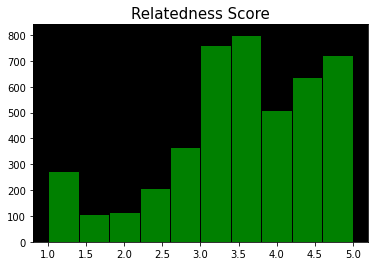

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sick_data['relatedness_score'], bins=10, color='green', edgecolor='black')
plt.title('Relatedness Score',fontsize=15)
ax = plt.axes()
ax.set_facecolor("black")
plt.show()                             #using matplotlib library to plot histogram of relatedness_score

The relatednes scoring: 469 pairs within the (1,2) range, 765 pairs within the (2,3) range, 1915 pairs within the (3,4) range, 
and 1683 pairs within the (4,5) range; <br>The entailment_judgment 2536 neutral pairs, 665 contradiction pairs, and 1299 entailment pairs.<br>
Based on the histogram of relatedness score, the relatedness score is higher
between 750th and 800th rows of the dataset and these sentences could be considered very similar.

In [24]:
contrast_sentences=sick_data.loc[sick_data['entailment_judgment'] == 'CONTRADICTION']
contrast_sentences

,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment
14,42,Two people are kickboxing and spectators are n...,Two people are kickboxing and spectators are w...,3.4,CONTRADICTION
36,88,There is no biker jumping in the air,A lone biker is jumping in the air,4.2,CONTRADICTION
37,90,A man is jumping into an empty pool,A man is jumping into a full pool,3.0,CONTRADICTION
50,122,Five kids are standing close together and one ...,Five kids are standing close together and none...,3.7,CONTRADICTION
61,141,A group of friends are riding the current in a...,A group is not riding the current in a raft,3.7,CONTRADICTION
...,...,...,...,...,...
4327,9616,No people are riding camels at the beach,People are riding two camels at the beach,3.7,CONTRADICTION
4338,9643,A brown and white dog is running through the r...,A brown and white dog is not running through t...,3.6,CONTRADICTION
4340,9645,No dog is emerging from a lake,A dog is emerging from a lake,4.0,CONTRADICTION
4382,9726,The motorcycle racer is riding a red and black...,No motorcycle racer is riding a red and black ...,3.8,CONTRADICTION


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


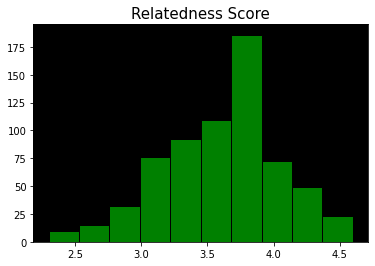

In [25]:
import matplotlib.pyplot as plt
plt.hist(contrast_sentences['relatedness_score'], bins=10, color='green', edgecolor='black')
plt.title('Relatedness Score',fontsize=15)
ax = plt.axes()
ax.set_facecolor("black")
plt.show()     

In [26]:
sick_data_subset=sick_data.loc[sick_data['relatedness_score'] >= 4]
sick_data_subset             #SUBSET OF SICK DATASET WITH RELATEDNESS_SCORE >= 4

,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.5,NEUTRAL
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.7,ENTAILMENT
5,12,Two dogs are fighting,Two dogs are wrestling and hugging,4.0,NEUTRAL
11,30,A man with a jersey is dunking the ball at a b...,The ball is being dunked by a man with a jerse...,4.9,ENTAILMENT
15,44,Two young women are sparring in a kickboxing f...,Two women are sparring in a kickboxing match,4.9,ENTAILMENT
...,...,...,...,...,...
4386,9736,The woman is wearing ear protection and is fir...,A woman is shooting at target practice,4.3,ENTAILMENT
4387,9738,A woman is wearing ear protection and is firin...,A woman is firing at target practice,4.1,ENTAILMENT
4388,9744,A little boy is sticking his tongue out for th...,A little boy is sticking his tongue out for th...,4.2,CONTRADICTION
4392,9752,A dog is running on concrete and is holding a ...,A dog is running on concrete and is holding a ...,4.7,ENTAILMENT


In [27]:
sick_data_subset.to_csv('sick_data_subset', encoding='utf-8', index=False) #CREATING A CSV FILE

In [30]:
neutral_sentence=sick_data.loc[(sick_data['entailment_judgment'] == 'NEUTRAL') & (sick_data['relatedness_score'] >= 4)]
neutral_sentence
neutral_sentence.to_csv('neutral_sentence', encoding='utf-8', index=False) #SUBSET OF SICK DATASET WITH ONLY NEUTRAL SENTENCES HAVING RELATEDNESS_SCORE>=4

In [31]:
contradiction_sentence=sick_data.loc[(sick_data['entailment_judgment'] == 'CONTRADICTION') & (sick_data['relatedness_score'] >= 4)]
contradiction_sentence
contradiction_sentence.to_csv('contradiction_sentence', encoding='utf-8', index=False) #SUBSET OF SICK DATASET WITH ONLY CONTRADICTED SENTENCES HAVING RELATEDNESS_SCORE>=4

In [32]:
entailment_sentence=sick_data.loc[(sick_data['entailment_judgment'] == 'ENTAILMENT') & (sick_data['relatedness_score'] >= 4)]
entailment_sentence
entailment_sentence.to_csv('entailment_sentence', encoding='utf-8', index=False) #SUBSET OF SICK DATASET WITH ONLY ENTAILMENT SENTENCES HAVING RELATEDNESS_SCORE>=4